In [1]:
import os
import numpy as np
import cv2
import skimage
from matplotlib import pyplot as plt

In [3]:
e = '/home/becode/dr-robin/concrete/subset/W/CW/7069-26.jpg'

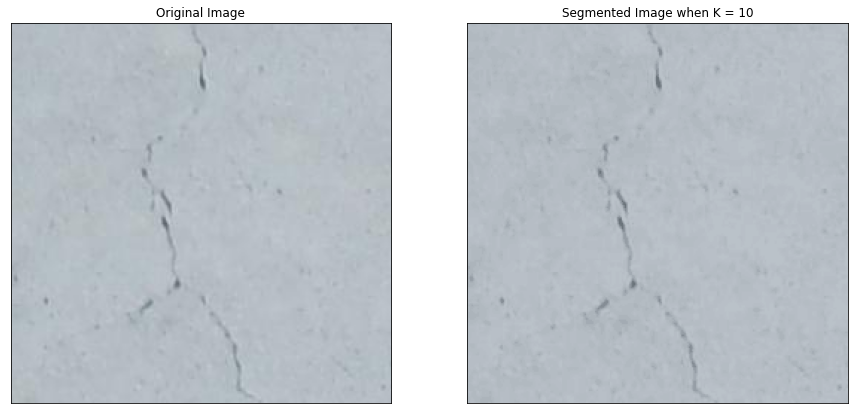

In [19]:
#experimenting with clustering
image = cv2.imread(e)
img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

vectorized = img.reshape((-1,3))

vectorized = np.float32(vectorized)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K = 10
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)


center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape((img.shape))

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

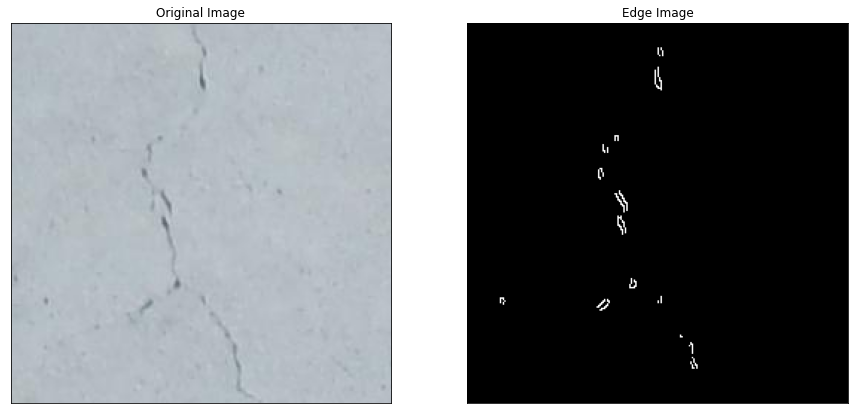

In [20]:
#experimenting with canny edge on clustered image
edges = cv2.Canny(result_image,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

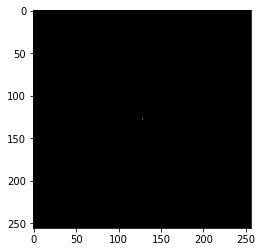

In [21]:
#experimenting with skeletonize after clustering
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# perform skeletonization
skeleton = skeletonize(result_image)
plt.imshow(skeleton, cmap=plt.cm.gray)
plt.show()

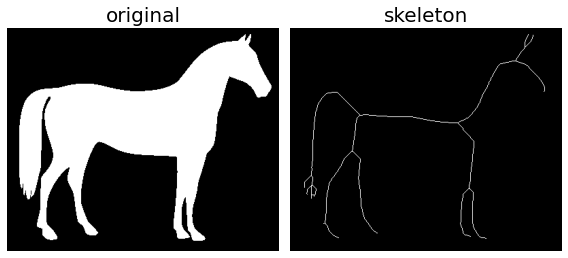

In [1]:
#Testing skeletonize on a horse image
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

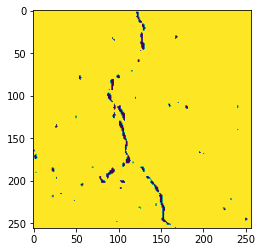

In [23]:
#Testing OTSU threshold approach

#image = cv2.imread(e)
gray = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

pixels = cv2.countNonZero(thresh)
# pixels = len(np.column_stack(np.where(thresh > 0)))

image_area = image.shape[0] * image.shape[1]
area_ratio = (pixels / image_area) * 100

plt.imshow(thresh)
print('image pixel area',image_area)
print('uncracked area',area_ratio)
print('%cracked area',100 - area_ratio)

TypeError: Invalid shape (4, 4, 2, 2) for image data

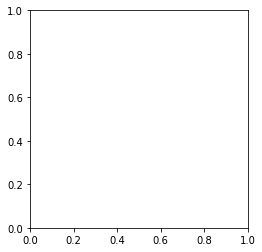

In [24]:
#Experimenting with extracting texture features
from skimage.feature.texture import greycomatrix
from skimage.feature.texture import greycoprops
image = np.array([[0, 0, 1, 1],
                   [0, 0, 1, 1],
                   [0, 2, 2, 2],
                   [2, 2, 3, 3]], dtype=np.uint8)
g = greycomatrix(image, [1, 2], [0, np.pi/2], levels=4,normed=True, symmetric=True)
contrast = greycoprops(g, 'contrast')
plt.imshow(g, cmap=plt.cm.gray)
plt.show()

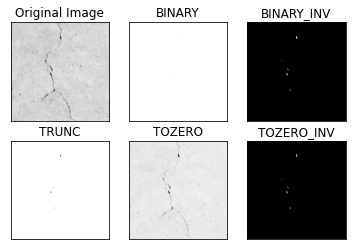

In [59]:
#experimenting with thresholding
import cv2 as cv
img = cv2.imread(e, 0)
ret,thresh1 = cv.threshold(img,100,200,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

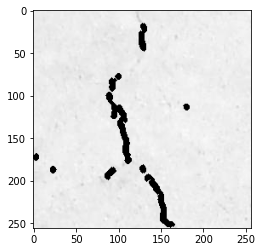

In [169]:
#experimenting with canny edge dection followed by contour finding
import numpy as np
import cv2

im = cv2.imread(e)
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray,50,150)
ret,thresh = cv2.threshold(edges,100,110,0)
contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
ii = cv2.drawContours(imgray, contours, -1, (0,100,0), 3)
plt.imshow(ii,cmap='gray')

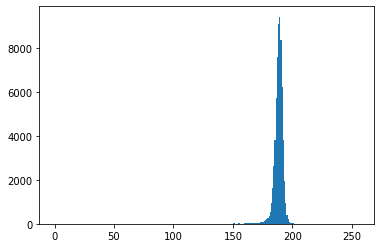

In [172]:
#checkig the histogram
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(e,0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

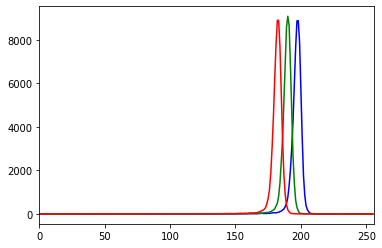

In [174]:
#checking the histogram of RGB values
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(e)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

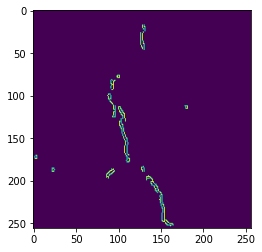

In [84]:
edges = cv2.Canny(img,50,150)
fig, ax = plt.subplots(1,1)
im = ax.imshow(edges)
#im2 = ax.imshow(img)
plt.show()
               

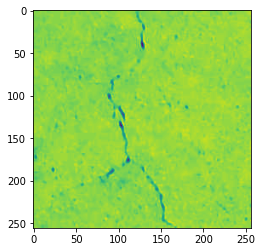

In [68]:
plt.imshow(img)

In [90]:
#Experimenting with Hough lines
import numpy as np

img = cv2.imread(e,0)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)

error: OpenCV(4.4.0) /tmp/pip-req-build-a3np7pha/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


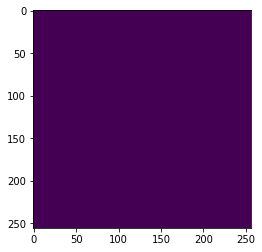

In [125]:
#experimentign with morphology and closing lines
import cv2

closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(edges,kernel,iterations = 1)
plt.imshow(erosion)

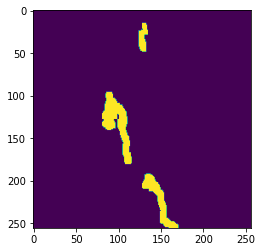

In [126]:
#experimenting with dilation
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 1)
plt.imshow(dilation)

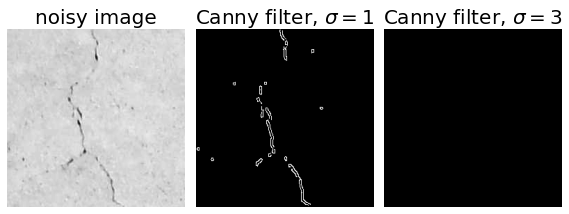

In [36]:
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)
im = img
# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=4)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()